<a href="https://colab.research.google.com/github/BarisSari/Algorithms/blob/master/Overfitting%2C_Underfitting%2C_Cross_Validation%2C_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [0]:
diabetes = datasets.load_diabetes() # load data

In [0]:
diabetes.data.shape # feature matrix shape

(442, 10)

In [0]:
diabetes.target.shape # target vector shape

(442,)

In [0]:
diabetes.feature_names # column names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

When training on data, we don't want to use all of our data to train the model, because we want to section off some data for us to test the models performance. The reason why we can't just use the data the model was trained on to judge the model's performance is because that would give an overly optimistic view on how the model is doing. It's like giving you the exact same test to practice on as the one you will take on test day. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

There are three steps to getting a model up and running in sklearn. 
1. Set up the model
2. Fit the model 
3. Check the score

In [0]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
print(model.score(X_test, y_test))
model_final = model

0.33222203269065176


![alt text](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/10/root-mean-square-error.png)

This is the loss function so that the model can see how well it is predicting and adjust.

In [0]:
model.coef_ # Get the coefficients, beta

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [0]:
model.intercept_ # Get the intercept, c

152.5381335195406

In [0]:
model.predict(X_test) # Predict unkown data

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

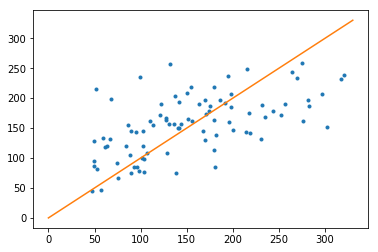

In [0]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
Mean squared error: 3424.32
Variance score: 0.33


# Overfitting and Underfitting

Underfitting is when models does not perform well on the training data of the test data. It is not able to capture the actual relationship between the features and the output, and instead has a strong preconcieved notion of what the relatioinship is.

![alt text](https://miro.medium.com/max/1564/1*Gl5dciQc0H72vnZr5vIGqA.png)

Overfitting is when models perform very well on the training data but perform poorly on the test data. The model is able to fit training points very closely,  but cannot generalize well to new examples because it has learned a relationship that is overly complex and overly specialized to the training set. 

![alt text](https://ardianumam.files.wordpress.com/2017/09/overfitting1.jpg)


In [0]:
print("Testing accuracy: ", model.score(X_test, y_test))
print("Training accuracy: ", model.score(X_train, y_train))

Testing accuracy:  0.33222203269065176
Training accuracy:  0.5539285357415583


Our testing accuracy and training accuracy are both pretty low. That may be a sign that our model has underfit the training data.

One way we can reduce underfitting is by adding on polynomial features, meaning we take on of our features, square it, or cube it, or multiply with another feature, and then add that as another data column. That way, our model has essentially more to go off of when it learns. Here, PolynomialFeatures is a tool provided by the sklearn library that can easily create those polynomial features for us, and we can easily select the degree we want. Right now, we are using a degree of two, which is a quadratic fit.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(diabetes.data[:, 0:3])
poly_features = np.delete(poly_features, (0, 1, 2), 1)
poly_data = np.concatenate((diabetes.data, poly_features), axis = 1)
print(poly_data.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(poly_data, diabetes.target, test_size=0.2, random_state=0)

(442, 17)


In [0]:
model.fit(X_train2, y_train2)
print(model.score(X_test2, y_test2))
print(model.score(X_train2, y_train2))

0.35292669507760577
0.5794148059518287


We are doing marginally better. We essentially did this to our model. We turned the linear fit into a quadratic fit.
![This is not our data](https://animoidin.files.wordpress.com/2018/07/polim_vs_linear.jpg?w=909&h=584&crop=1)

The degree of two was one I randomly selected. What happens if I select a degree of 8?

In [0]:
poly = PolynomialFeatures(degree = 8)
poly10_features = poly.fit_transform(diabetes.data[:, 0:3])
poly10_features = np.delete(poly10_features, (0, 1, 2), 1)
poly10_data = np.concatenate((diabetes.data, poly10_features), axis = 1)
print(poly10_data.shape)
X_train10, X_test10, y_train10, y_test10 = train_test_split(poly10_data, diabetes.target, test_size=0.2, random_state=0)

(442, 172)


In [0]:
model.fit(X_train10, y_train10)
print(model.score(X_train10, y_train10))
print(model.score(X_test10, y_test10))

0.6486828967643996
0.18729864038150798


Here we can see that the score on the training set is better, but the score on the test set is a lot worse. This is what we were just talking about, overfitting. Clearly the degree of the polynomial we choose has a lot to do with whether our model will underfit or overfit. But we can't just keep trying random degrees until we hit the right one. That's why we'll use cross validation instead.

#Cross Validation

We discussed overfitting above. It is a common problem in machine learning where models seem to be achieving very high accuracy when training, but then just completely fail in real world settings. This is probably because the model is overfitting to the data and instead of forming a general function that relates diabetes to some attributes (age, bmi, sex, etc.), the model is "cheating" and just adjusting to random noise in the data.

In essence we want to see how well the model will perform in the real world.  In the real world, the model receives data it has never seen before and it is asked to make predictions about this data.  So the only real way to assess the accuracy of your model is to test it on data it has never seen before. This is what cross validation is. There are many different methods of cross validation, but today we will be discussing the most basic one called the  "holdout" method.

When we originally receive some data, we keep some aside that we will test the model on in the end. This is the "test" set.  Most of the data will be used to train the model so it is the  "train" set.  


![alt text](https://miro.medium.com/max/2840/1*-8_kogvwmL1H6ooN1A1tsQ.png)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)
print(diabetes.data.shape)
X_train.shape

(442, 10)


(353, 10)

This is what this line of code is doing above. It is splitting the original data into train sets and test sets. If you noticed the shape of the original dataset, it has 442 rows.  In the train_test_split, we specify that the test_size is 0.2.  This means 20% of the data is given to the test set and 80% is set aside for the training set. So when we call X_train.shape, we see that the  training set has 353 rows,  which  is 80% of 442!

Another thing to note is when you are splitting the original data, you must randomize the rows you are selecting for training and testing so the model is training and testing on diverse data.

In [0]:
print(model_final.score(X_train, y_train))
print(model_final.score(X_test, y_test))

ValueError: ignored

As we see here, the test score is significantly lower than the train score showing that our original model did overfit.  This is to be expected, since we didn't add anything to our model to prevent it from overfitting. But at least we know what the true score of this model will be in the real world and we can work to improve it, rather than getting false high hopes by just going off of the training score.

#Video!

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('JMLsHI8aV0g')